<a href="https://colab.research.google.com/github/MadhurimaPaul-87/Machine_Learning/blob/main/Anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
df = pd.read_csv("/content/Anova.csv", header = None)

In [40]:
df

,0,1,2,3
0,60,50,48,47
1,67,52,49,67
2,42,43,50,54
3,67,67,55,67
4,56,67,56,68
5,62,59,61,65
6,64,67,61,65
7,59,64,60,56
8,72,63,59,60
9,71,65,64,65


In [41]:
len(df)

10

In [42]:
df.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [43]:
len(df.columns)

4

In [44]:
len(df)*len(df.columns)

40

In [45]:
means = df.mean()

In [46]:
means

0    62.0
1    59.7
2    56.3
3    61.4
dtype: float64

In [47]:
len(means)

4

Finding meanOfmeans (Approach 1)

In [48]:
n = len(df)*len(df.columns)
s=0

for i in range(len(df)):
  for j in range(len(df.columns)):
    s= s+ df.loc[i,j]

meanOfMeans = s/n
print(meanOfMeans)

59.85


Findinng meansOfMeans (Approach 2)

Flattening and making it one dimensional array

In [49]:
import numpy as np
x=np.array(df)
x.shape

(10, 4)

In [50]:
x=x.reshape(40,1)
x.shape

(40, 1)

In [51]:
meanOfMeans_2 = x.mean()
print(meanOfMeans_2)

59.85


Finding SSB

In [52]:
SSB = 0
for i in range(len(df.columns)):
  SSB = SSB + (means[i]-meanOfMeans)**2
  print(SSB)

4.622499999999994
4.644999999999994
17.247500000000024
19.650000000000013


In [53]:
SSB = SSB * len(df)

In [54]:
SSB

196.5000000000001

Finding SSW

In [55]:
SSW = 0
for i in range(len(df.columns)):
  for j in range(len(df)):
    SSW = SSW +(df.loc[j,i]-means[i])**2
SSW

2060.6

Finding F ratio

In [59]:
k = len(df.columns)
m = len(df)              
MSB = SSB/(k-1)
MSB

65.50000000000004

In [60]:
MSW = SSW/(m*k-k)
MSW

57.23888888888889

In [61]:
F = MSB/MSW
F

1.144326895079104

Normality test

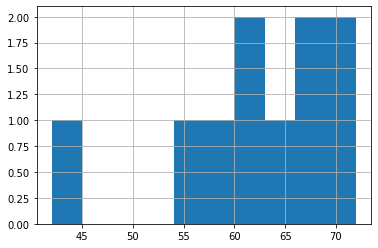

In [63]:
import matplotlib.pyplot as plt
df[0].hist()

## **Modular Approach**

In [64]:
def get_n_k(df):
  n= len(df)
  k= len(df.columns)
  return n, k

In [65]:
def getTreatmentMeans(df):
  return df.mean()

In [66]:
def getTotalMean(df):
  x = np.array(df)
  x= x.reshape(40,1)
  return x.mean()

In [71]:
def getSSB(df, TreatmentMeans):
  if len(df.columns)!= len(TreatmentMeans):
    return "error!!!"
  SSB = 0
  for i in range(len(TreatmentMeans)):
    SSB = SSB + (means[i]-meanOfMeans)**2
  return SSB*len(df)

In [68]:
def getSSW(df,TotalMean):
  SSW = 0
  for i in range(len(df.columns)):
    for j in range(len(df)):
      SSW = SSW +(df.loc[j,i]-means[i])**2
  return SSW

In [69]:
def ANOVA(df):
  n,k = get_n_k(df)
  TreatmentMeans = getTreatmentMeans(df)
  TotalMean = getTotalMean(df)
  SSB = getSSB(df, TreatmentMeans)
  SSW = getSSW(df,TotalMean)
  MSB = SSB/(k-1)
  MSW = SSW/(n*k-k)
  return MSB/MSW

In [72]:
print(ANOVA(df))

1.144326895079104


# **ANOVA using scipy**

In [73]:
import scipy.stats as stats
stats.f_oneway(df[0],df[1],df[2],df[3]) 

F_onewayResult(statistic=1.1443268950791026, pvalue=0.3443595629359094)